# Weight correction factor
<div align="right">2022-09-20 11:14</div>
For a presumably constant source $S_1$ with a variable neighbor $S_2$, I've
[derived](https://tburnett.github.io/wtlike/sources.html#Accounting-for-variations-from-neighboring-sources) the following:

$$w'_1 = \frac{w_1}{1+\alpha_2\ w_2}\ \ ,   $$
where  $w_1$ and $w_2$ are the corresponding weights for a common pixel/band, and $\alpha_2$ is the source flux factor for $S_2$. 

We will test this, with $S_1$ as the pulsar PSR J2032+4127 and $S_2$ the variable source Cyg X-3. 
The separation is ? deg.

<figure style="margin-left: 25px" title="Figure 1">   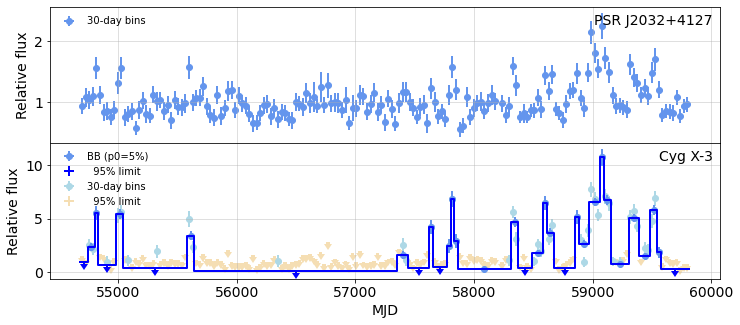  <figcaption><b>Figure 1</b>. Upper plot: the pulsar PSR J2032+4127; lower plot: Bayesian block output of the variable source.</figcaption></figure>


### Demonstrate the effect of applying the correction.

#### Before:




Bayesian Blocks: partitioning 170 cells using LikelihoodFitness with penalty 5%
	found 10 / 170 blocks.
LightCurve: Loaded 10 / 10 cells for fitting


#### Long-term variability for PSR J2032+4127
<figure style="margin-left: 25px" title="Figure 1">   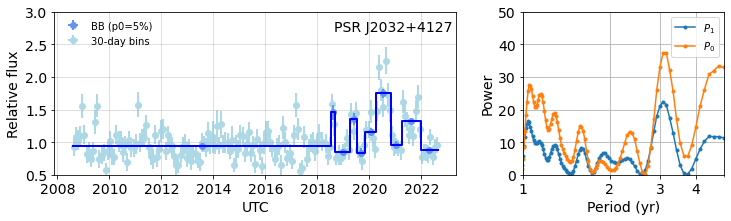 </figure>




#### After:

Applied correction to the pulsar PSR J2032+4127 from the nearby variable source Cyg X-3



CellData.rebin: Bin photon data into 171 30-day bins from 54683.0 to 59813.0
LightCurve: select 170 cells for fitting with e>150 & n>2
Bayesian Blocks: partitioning 170 cells using LikelihoodFitness with penalty 5%
	found 1 / 170 blocks.
LightCurve: Loaded 1 / 1 cells for fitting


#### Long-term variability for PSR J2032+4127
<figure style="margin-left: 25px" title="Figure 1">   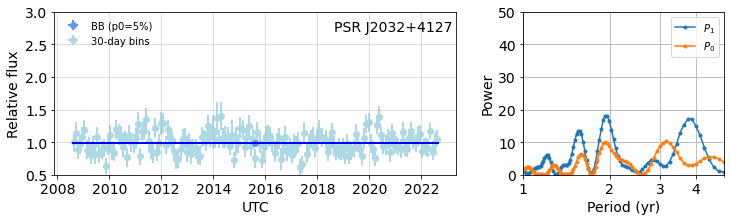 </figure>


So both $P_0$ and $P_1$ are now smaller, and the relative size seems to be reversed.
    


In [40]:
%run code/weight_correction

In [37]:
# x = WtLike('J2016+3710')

# x.bb_view().plot();

In [ ]:
# cat = Fermi4FGL()
# var_cut=50
# name = get_global('S1')
# near_df = cat.select_cone(name, query=f'variability>{var_cut}')
# near_df['name'] = near_df.index
# df = near_df['sep significance variability'.split()].sort_values('sep')
# df

# for name in 'J1957+5033 J2021+3651 J2028+3332'.split(): 
#     check_nearby('PSR '+name, radius_cut=3)

# wtl_b = wpm = None
# @ipynb_doc
# def study_variable(name):
#     """
#     ### Check the variable source {name}
#     {out1}
    
#     #### The light curve
#     {fig1}
    
#     #### and its periodogram

#     {fig2}
#     """
#     global wtl_b, wpm
#     with capture_hide(f'Set up WtLIke for {name}') as out1:
#         wtl_b = WtLike(name)
#         wpm = wtl_b.periodogram()
#     fig1 = wtl_b.plot()
#     fig2, ax2 = plt.subplots(figsize=(6,3))
#     wpm.power_plot(ax=ax2, xscale='log', xlim=(1e-4, 0.1))
#     return locals()

# near_name = near_df.iloc[0].name
# ww = study_variable(near_name)

# wtl = WtLike('PKS 0208-512')#name, time_bins=time_bins) if type(name)==str else name
# name = wtl.source.name
# pgm = wtl.periodogram()
# pgm.power_spectrum();

# def lowfreqplot(pgm, ax=None, over=None, pticks=[1,1.5,2,4,8],**kwargs):
    
#     fig, ax = plt.subplots(figsize=(5,3)) if ax is None else (ax.figure, ax)
#     yr = 365.25
#     df = pgm.power_df.query('f<0.0028').copy()
#     # fig2, ax = plt.subplots(figsize=(4,3))
#     x = df.f*yr
#     ax.plot(x, df.p1, '.-', label='periodogram')
#     kw = dict(xlabel='Frequency $yr^{-1})$', ylabel='Power $p_1$')
#     kw.update(kwargs)
#     ax.set(**kw)
#     ax.grid()
    
#     if over is not None:
#         lims = dict(xlim=ax.get_xlim(), ylim= ax.get_ylim())
#         over.plot(ax=ax, color='r', ls='--',label='sinc overlay')
#         ax.set(**lims)

#     # ax.legend(fontsize=10)
#     if pticks is None: return
#     a,b = np.array(ax.get_xlim())
#     x2 = lambda p: (1/p-a)/(b-a)
#     ax.twiny().set(xlabel='Period (yr)',xlim=(0,1),
#             xticks=x2(np.array(pticks)), 
#             xticklabels=[ f'{t}' for t in pticks]) 
#     ax.legend(fontsize=10)


In [ ]:
# fig, ax = plt.subplots(figsize=(5,3))
# over=Sinc(3e3, 0.5, 365.25/5000);
# #over.plot(ax=ax)

# lowfreqplot(pgm, ax=ax, over=over);
# 365*(np.array(over.lim()))

# over.plot(ax=ax)

# @ipynb_doc
# def variability_plots(name, time_bins=(0,0,7), tsamp=1/24, pmax=None ):
#     """
#     #### Long-term variability for {name}
#     {fig1}
    
#     """
#     with capture_hide('Setup output') as txt:
#         wtl = WtLike(name, time_bins=time_bins) if type(name)==str else name
#         name = wtl.source.name
#         pgm = wtl.periodogram(tsamp=tsamp)
#         pgm.power_spectrum()
        
#     def left(ax):
#         wtl.plot(ax=ax, UTC=True)    
    
#     def right(ax):
#         lowfreqplot(pgm, ax=ax, over=Sinc(3000, 1e-3, 1/5000)
# #         df = pgm.power_df.query( '5e-4< f<0.003').copy()
# #         df.loc[:,'period'] = 1/df.f/365.25

# #         ax.plot(df.period, df.p1, '.-', label='$P_1$')
# #         ax.plot(df.period, df.p0, '.-', label='$P_0$')
# #         ax.set(xlabel='Period (yr)', xscale='log', 
# #             xlim=(1,5),ylabel='Power', ylim=(0,pmax),
# #             xticks=[1,2,3,4], xticklabels='1 2 3 4'.split())
# #         ax.grid()
# #         ax.legend(fontsize=10)
        
#     fig1 = plt.figure(figsize=(12,3))
#     fig1.subplots_adjust(wspace=0)
#     gs = plt.GridSpec(1,10)
#     left(  fig1.add_subplot(gs[:6]) )
#     right( fig1.add_subplot(gs[7:]) )
#     return locals()

# variability_plots(WtLike('PKS 0208-512'))

# variability_plots('4FGL J0019.6+7327')

# variability_plots('4FGL J0019.6+7327')